# 비만정도에 따른 질병여부 비교

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# altair 라이브러리 사용
!pip install altair
import altair as alt

In [2]:
검진정보 = pd.read_csv(
    "./검진정보.csv",
)

In [4]:
검진정보['비만정도'] #저체중, 정상, 위험, 1단계, 2단계

0             정상
1         1단계 비만
2             정상
3         1단계 비만
4             정상
           ...  
999995    1단계 비만
999996        정상
999997        정상
999998    1단계 비만
999999        정상
Name: 비만정도, Length: 1000000, dtype: object

## 비만 상태에 따른 간질환 여부

In [5]:
df = 검진정보.groupby(["비만정도","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df

,비만정도,성별,연령대,간질환,빈혈유무,BMI,혈압,당뇨,혈청크레아티닌유무,신장질환,사람수,성별-연령대
0,1단계 비만,남,40대,비정상,8373,8373,8373,8373,8373,8373,8373,40대-남
1,1단계 비만,남,40대,위험군,15083,15083,15083,15083,15083,15083,15083,40대-남
2,1단계 비만,남,40대,정상,45865,45865,45865,45861,45865,45865,45865,40대-남
3,1단계 비만,남,50대,비정상,7315,7315,7315,7314,7315,7315,7315,50대-남
4,1단계 비만,남,50대,위험군,10644,10644,10644,10644,10644,10644,10644,50대-남
...,...,...,...,...,...,...,...,...,...,...,...,...
145,정상,여,70대,위험군,982,982,982,982,982,982,982,70대-여
146,정상,여,70대,정상,19243,19243,19243,19243,19243,19243,19243,70대-여
147,정상,여,80대,비정상,136,136,136,135,136,136,136,80대-여
148,정상,여,80대,위험군,233,233,233,233,233,233,233,80대-여


In [6]:
# 비만정도 - 간질환
# 간질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('간질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

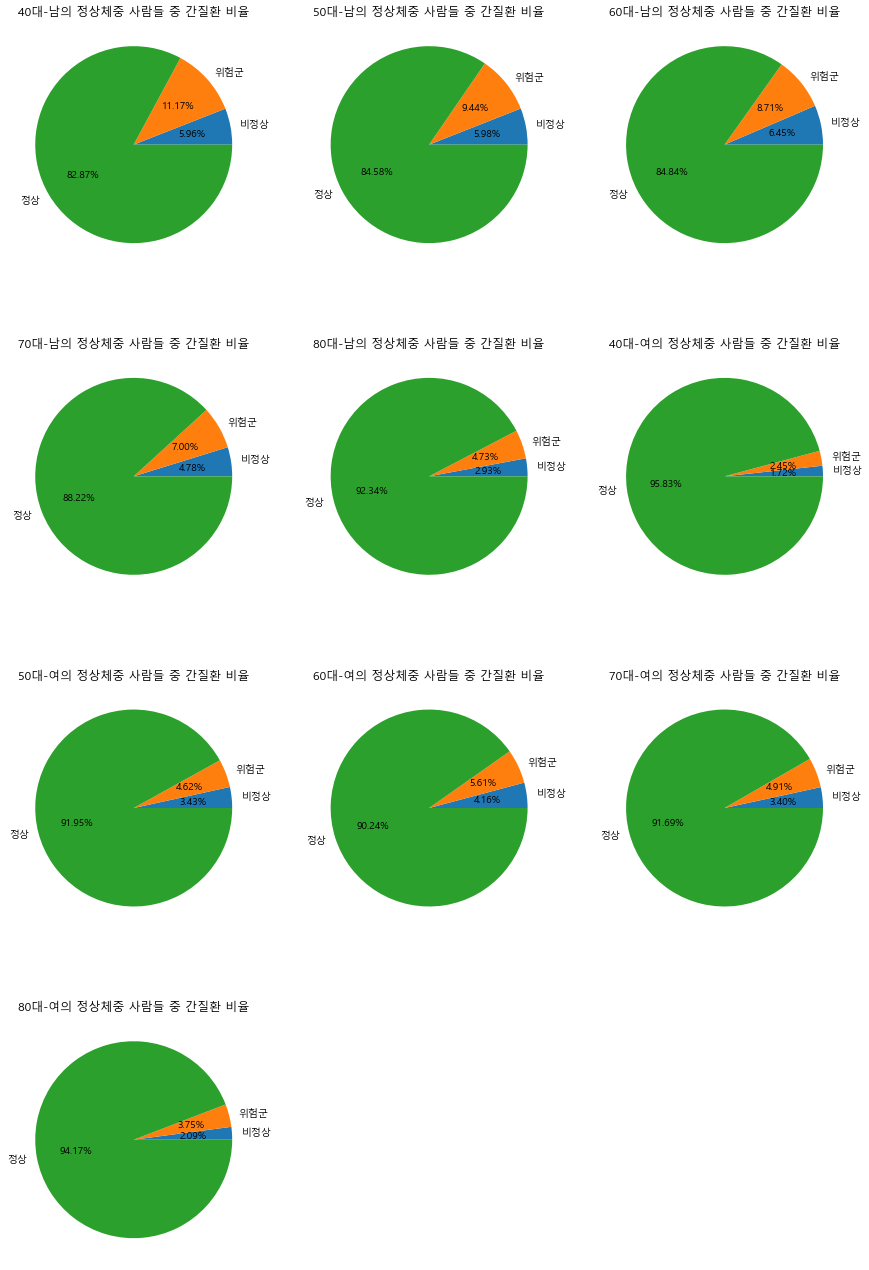

In [13]:
#정상체중이면 간질환이 있을까?

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 정상체중 사람들 중 간질환 비율')
    j += 1

plt.show()

## 비만정도에 따른 신장질환 여부

In [14]:
df = 검진정보.groupby(["비만정도","성별","연령대", "신장질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,비만정도,성별,연령대,신장질환,빈혈유무,BMI,혈압,당뇨,혈청크레아티닌유무,간질환,사람수,성별-연령대
0,1단계 비만,남,40대,비정상,6065,6065,6065,6065,6065,6065,6065,40대-남
1,1단계 비만,남,40대,위험군,7124,7124,7124,7123,7124,7124,7124,40대-남
2,1단계 비만,남,40대,정상,56132,56132,56132,56129,56132,56132,56132,40대-남
3,1단계 비만,남,50대,비정상,5843,5843,5843,5843,5843,5843,5843,50대-남
4,1단계 비만,남,50대,위험군,7622,7622,7622,7620,7622,7622,7622,50대-남
5,1단계 비만,남,50대,정상,52238,52238,52238,52236,52238,52238,52238,50대-남
6,1단계 비만,남,60대,비정상,4473,4473,4473,4473,4473,4473,4473,60대-남
7,1단계 비만,남,60대,위험군,6515,6515,6515,6514,6515,6515,6515,60대-남
8,1단계 비만,남,60대,정상,34704,34704,34704,34703,34704,34704,34704,60대-남
9,1단계 비만,남,70대,비정상,2558,2558,2558,2558,2558,2558,2558,70대-남


In [16]:
# 비만정도 - 신장질환
# 신장질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('신장질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

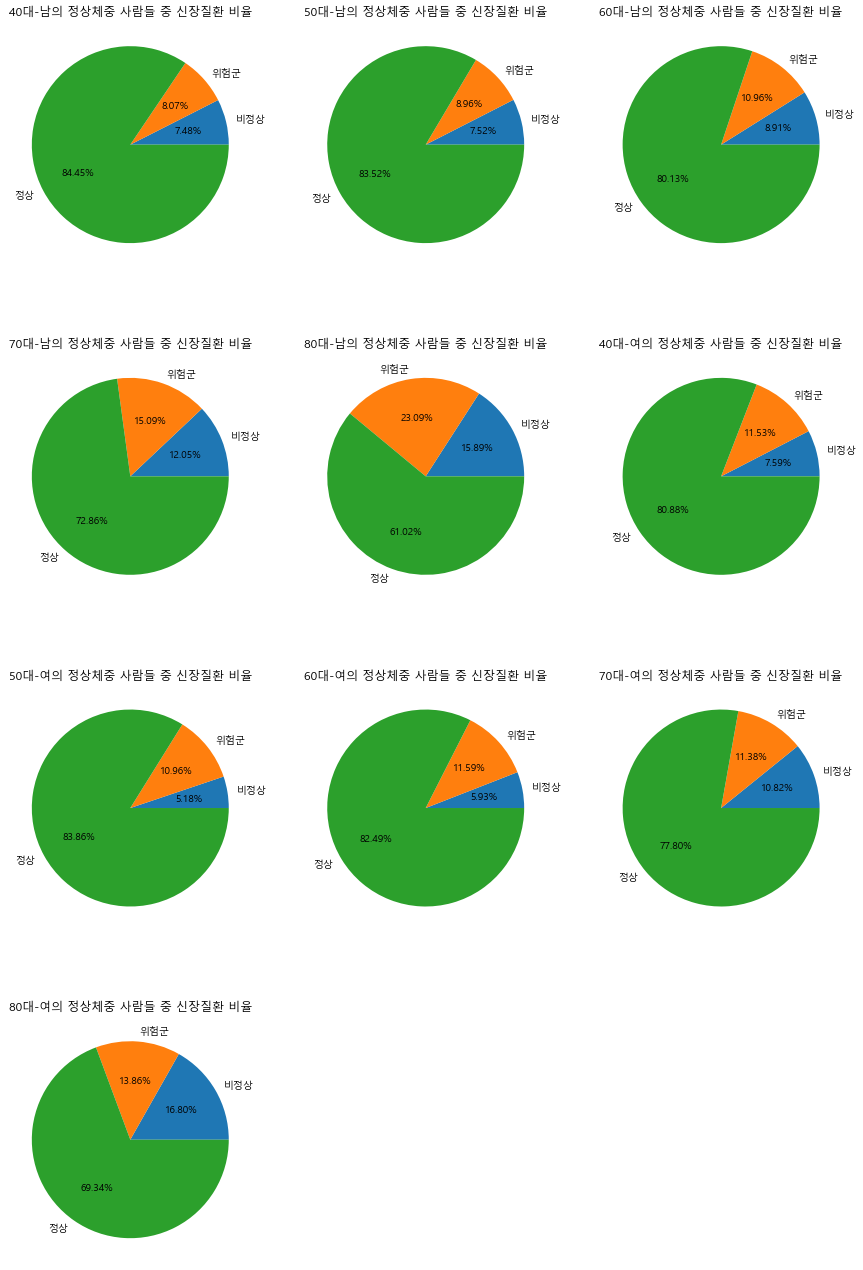

In [17]:
#정상체중이면 신장질환이 있을까?

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['신장질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['신장질환'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 정상체중 사람들 중 신장질환 비율')
    j += 1

plt.show()

## 비만정도에 따른 빈혈 여부

In [18]:
df = 검진정보.groupby(["비만정도","성별","연령대", "빈혈유무"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,비만정도,성별,연령대,빈혈유무,BMI,혈압,당뇨,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,1단계 비만,남,40대,비정상,212,212,212,212,212,212,212,40대-남
1,1단계 비만,남,40대,정상,69109,69109,69105,69109,69109,69109,69109,40대-남
2,1단계 비만,남,50대,비정상,343,343,343,343,343,343,343,50대-남
3,1단계 비만,남,50대,정상,65360,65360,65356,65360,65360,65360,65360,50대-남
4,1단계 비만,남,60대,비정상,504,504,504,504,504,504,504,60대-남
5,1단계 비만,남,60대,정상,45188,45188,45186,45188,45188,45188,45188,60대-남
6,1단계 비만,남,70대,비정상,555,555,555,555,555,555,555,70대-남
7,1단계 비만,남,70대,정상,17930,17930,17927,17930,17930,17930,17930,70대-남
8,1단계 비만,남,80대,비정상,241,241,241,241,241,241,241,80대-남
9,1단계 비만,남,80대,정상,3191,3191,3190,3191,3191,3191,3191,80대-남


In [19]:
# 비만정도 - 빈혈유무
# 간질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('빈혈유무:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

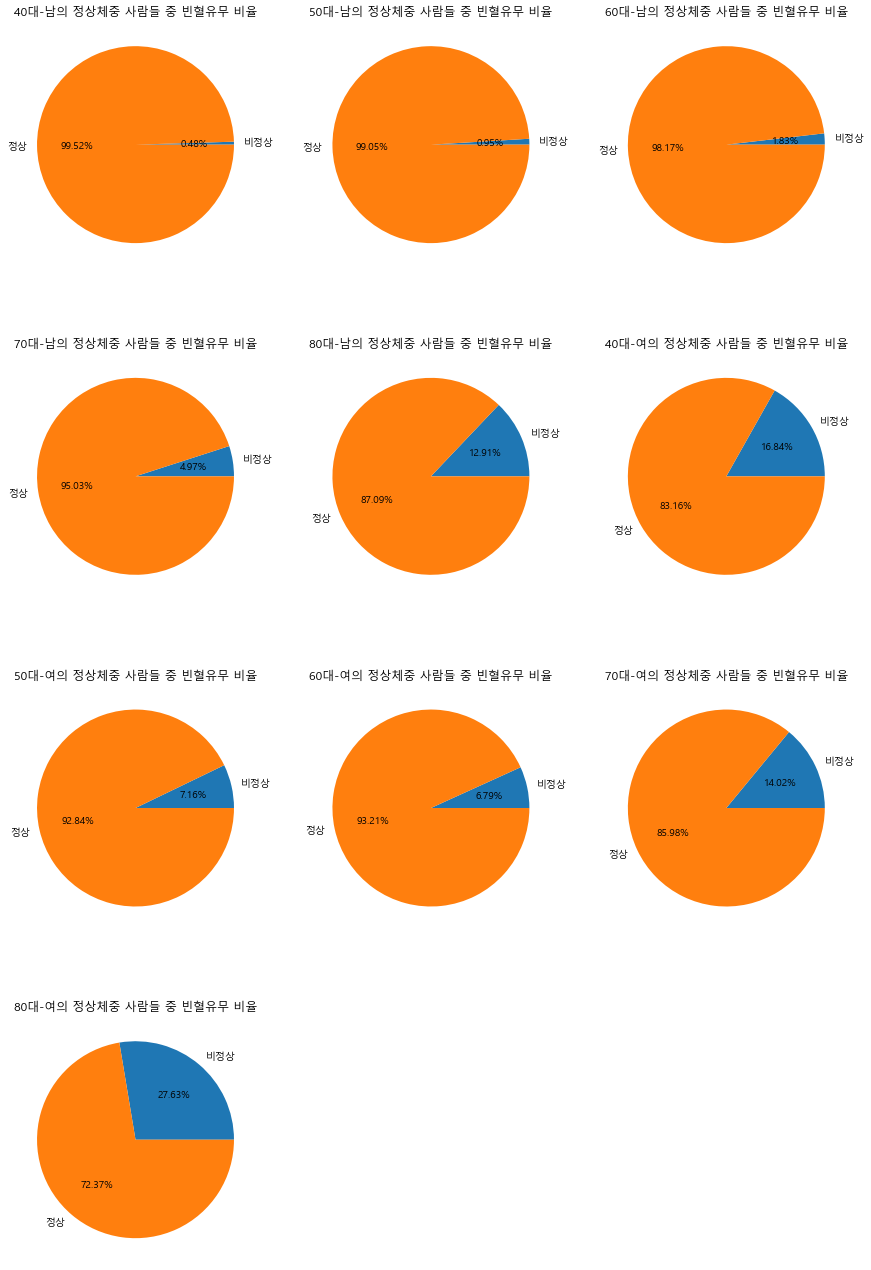

In [20]:
#정상체중이면 빈혈이 있을까?

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['빈혈유무'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['빈혈유무'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 정상체중 사람들 중 빈혈유무 비율')
    j += 1

plt.show()

## 비만정도에 따른 혈압 여부

In [22]:
df = 검진정보.groupby(["비만정도","성별","연령대", "혈압"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,비만정도,성별,연령대,혈압,빈혈유무,BMI,당뇨,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,1단계 비만,남,40대,고혈압,12750,12750,12747,12750,12750,12750,12750,40대-남
1,1단계 비만,남,40대,저혈압,71,71,71,71,71,71,71,40대-남
2,1단계 비만,남,40대,정상혈압,56500,56500,56499,56500,56500,56500,56500,40대-남
3,1단계 비만,남,50대,고혈압,13669,13669,13669,13669,13669,13669,13669,50대-남
4,1단계 비만,남,50대,저혈압,101,101,101,101,101,101,101,50대-남
5,1단계 비만,남,50대,정상혈압,51933,51933,51929,51933,51933,51933,51933,50대-남
6,1단계 비만,남,60대,고혈압,11080,11080,11080,11080,11080,11080,11080,60대-남
7,1단계 비만,남,60대,저혈압,61,61,61,61,61,61,61,60대-남
8,1단계 비만,남,60대,정상혈압,34551,34551,34549,34551,34551,34551,34551,60대-남
9,1단계 비만,남,70대,고혈압,5560,5560,5559,5560,5560,5560,5560,70대-남


In [24]:
# 혈압상태 - 비만여부
# 비만여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('혈압:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#e377c2','#ff6f69', '#ffcc5c','#17becf'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

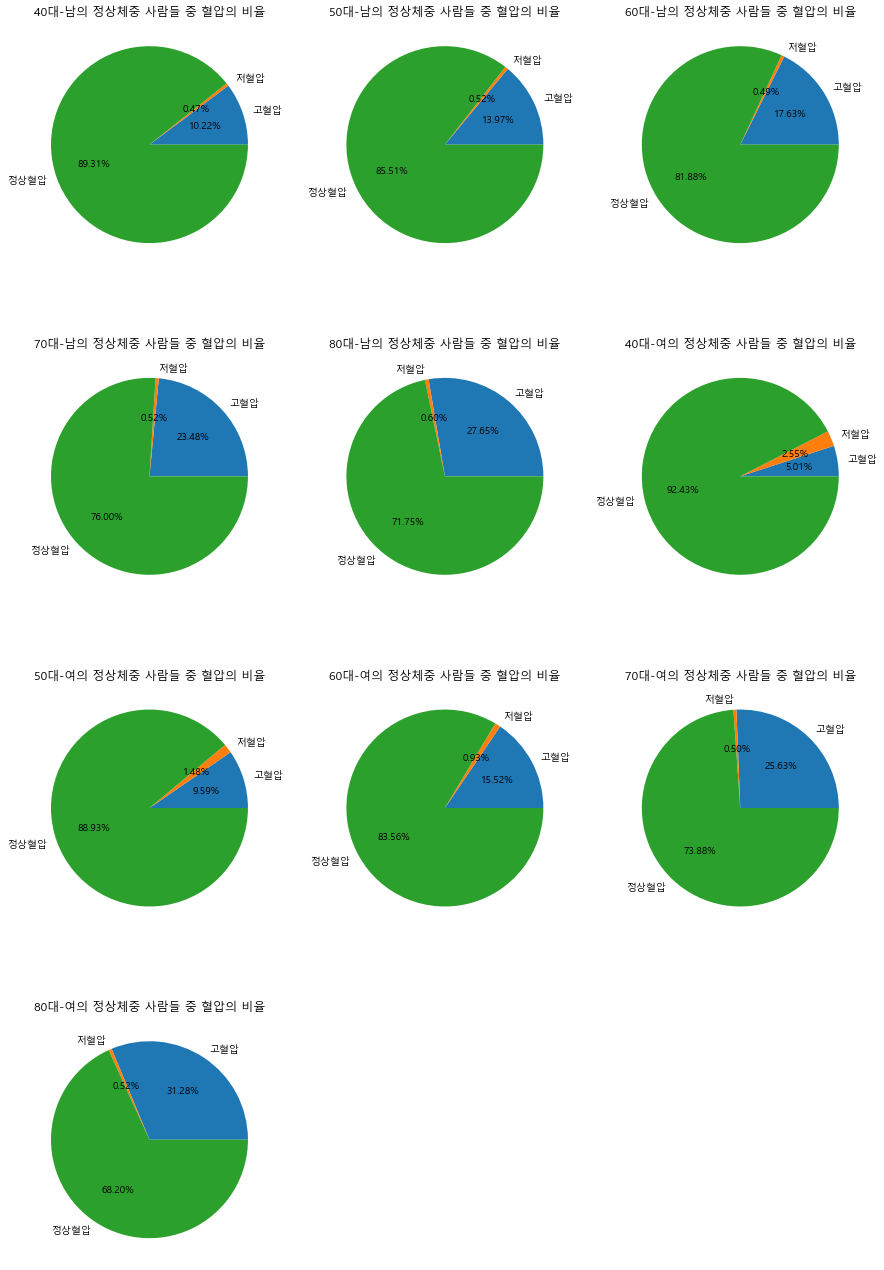

In [26]:
#정상체중이면 고혈압이 있을까?

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)


n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['혈압'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['혈압'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 정상체중 사람들 중 혈압의 비율')
    j += 1

plt.show()

## 비만정도에 따른 당뇨병 여부

In [27]:
df = 검진정보.groupby(["비만정도","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,비만정도,성별,연령대,당뇨,빈혈유무,BMI,혈압,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,1단계 비만,남,40대,공복혈당장애,27181,27181,27181,27181,27181,27181,27181,40대-남
1,1단계 비만,남,40대,당뇨병,6874,6874,6874,6874,6874,6874,6874,40대-남
2,1단계 비만,남,40대,정상,35262,35262,35262,35262,35262,35262,35262,40대-남
3,1단계 비만,남,50대,공복혈당장애,27602,27602,27602,27602,27602,27602,27602,50대-남
4,1단계 비만,남,50대,당뇨병,10793,10793,10793,10793,10793,10793,10793,50대-남
5,1단계 비만,남,50대,정상,27304,27304,27304,27304,27304,27304,27304,50대-남
6,1단계 비만,남,60대,공복혈당장애,19660,19660,19660,19660,19660,19660,19660,60대-남
7,1단계 비만,남,60대,당뇨병,8904,8904,8904,8904,8904,8904,8904,60대-남
8,1단계 비만,남,60대,정상,17126,17126,17126,17126,17126,17126,17126,60대-남
9,1단계 비만,남,70대,공복혈당장애,8068,8068,8068,8068,8068,8068,8068,70대-남


In [28]:
# 비만정도 - 당뇨여부
# 당뇨여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('당뇨:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

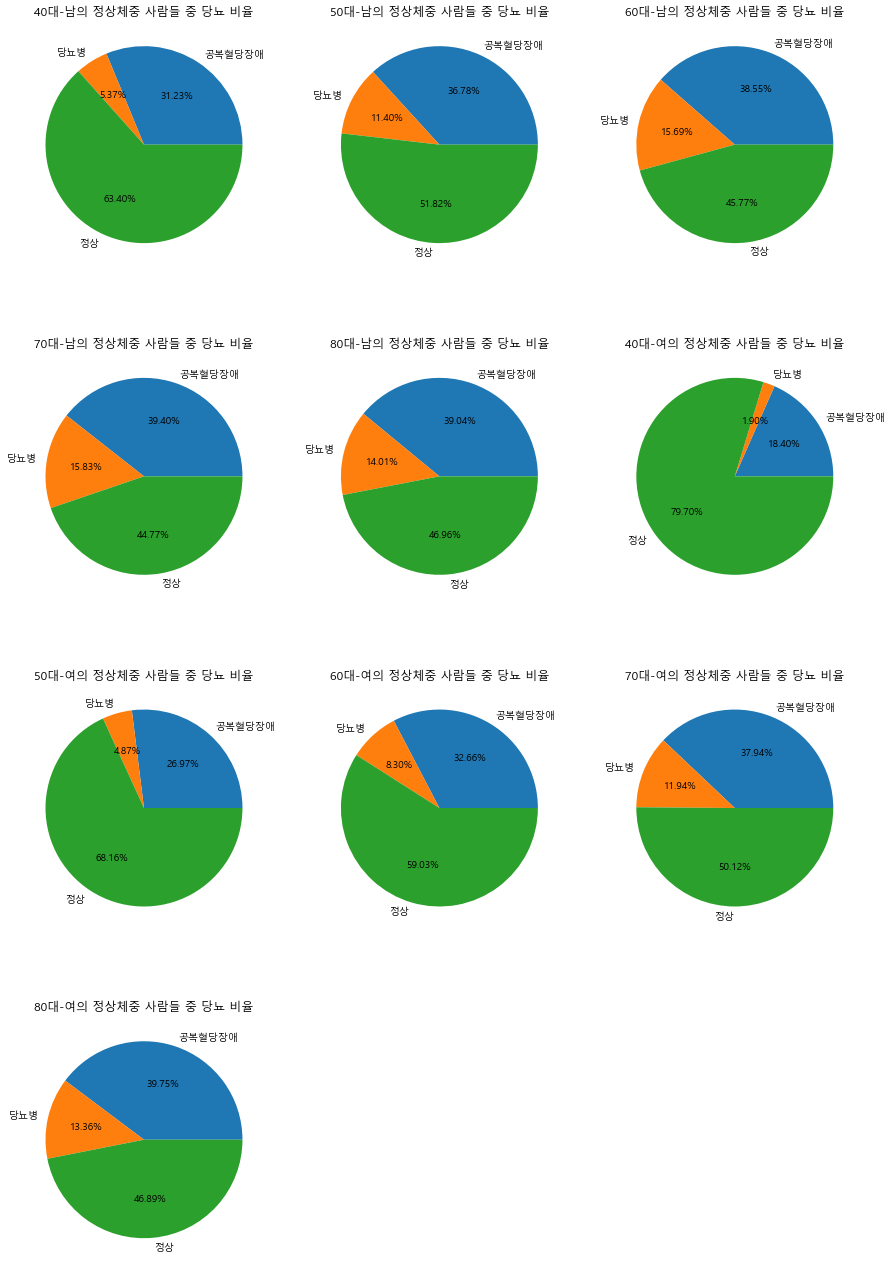

In [29]:
# 정상체중은 당뇨일까?

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['당뇨'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['당뇨'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 정상체중 사람들 중 당뇨 비율')
    j += 1

plt.show()

## 비만정도에 따른 간장질환 여부

In [30]:
df = 검진정보.groupby(["비만정도","성별","연령대", "혈청크레아티닌유무"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["간장질환"] = df["혈청크레아티닌유무"]
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,비만정도,성별,연령대,혈청크레아티닌유무,빈혈유무,BMI,혈압,당뇨,신장질환,간질환,사람수,간장질환,성별-연령대
0,1단계 비만,남,40대,비정상,8027,8027,8027,8026,8027,8027,8027,비정상,40대-남
1,1단계 비만,남,40대,정상,61294,61294,61294,61291,61294,61294,61294,정상,40대-남
2,1단계 비만,남,50대,비정상,8693,8693,8693,8691,8693,8693,8693,비정상,50대-남
3,1단계 비만,남,50대,정상,57010,57010,57010,57008,57010,57010,57010,정상,50대-남
4,1단계 비만,남,60대,비정상,7610,7610,7610,7609,7610,7610,7610,비정상,60대-남
5,1단계 비만,남,60대,정상,38082,38082,38082,38081,38082,38082,38082,정상,60대-남
6,1단계 비만,남,70대,비정상,4324,4324,4324,4322,4324,4324,4324,비정상,70대-남
7,1단계 비만,남,70대,정상,14161,14161,14161,14160,14161,14161,14161,정상,70대-남
8,1단계 비만,남,80대,비정상,1116,1116,1116,1116,1116,1116,1116,비정상,80대-남
9,1단계 비만,남,80대,정상,2316,2316,2316,2315,2316,2316,2316,정상,80대-남


In [31]:
# 비만정도 - 간장질환여부
# 간장질환여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('간장질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ff6f69', '#ffcc5c'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

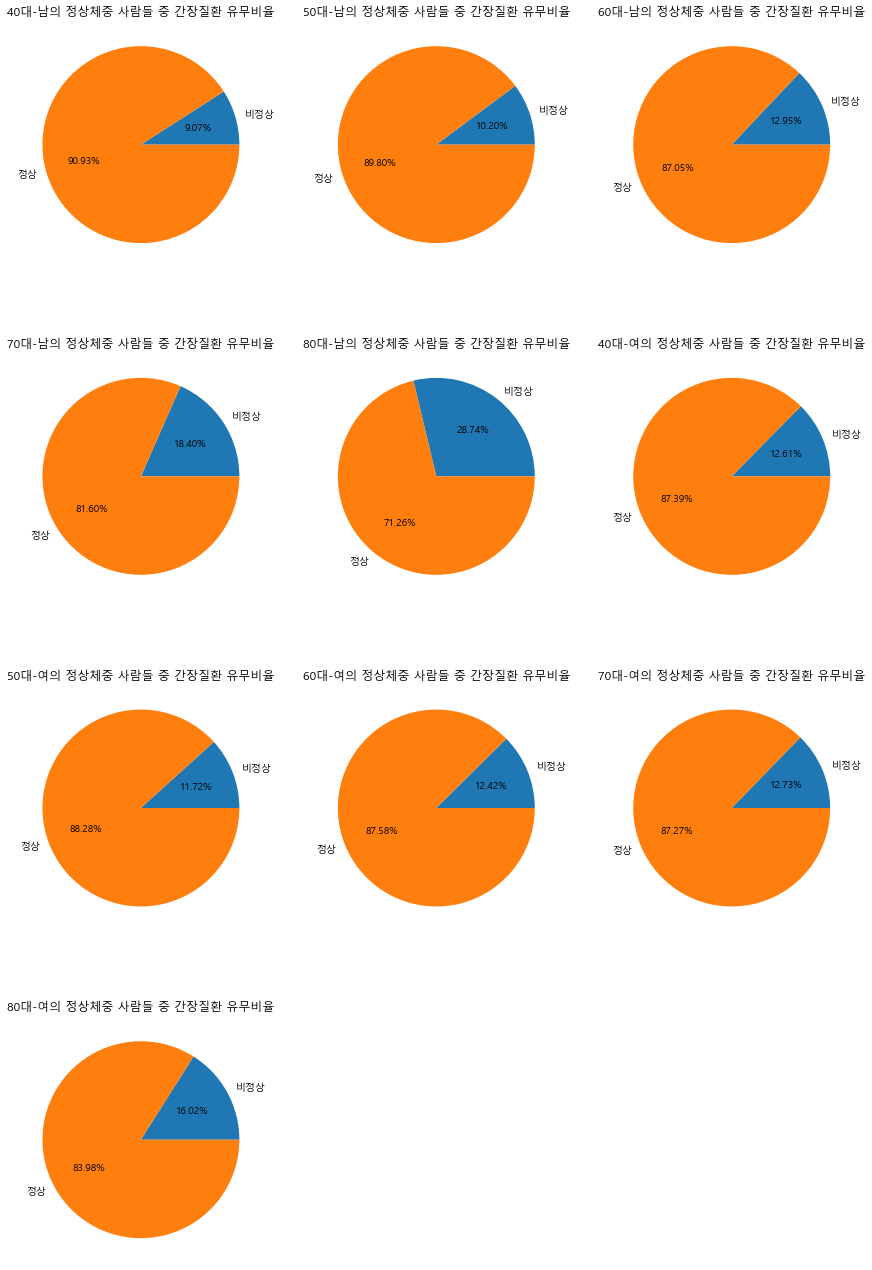

In [32]:
# 정상체중은 간장질환이 있일까?

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간장질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간장질환'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 정상체중 사람들 중 간장질환 유무비율')
    j += 1

plt.show()